<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana4/2%20Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El *teorema del límite central* establece que la **distribución de la suma** de un número grande (*ley de los grandes números*) de ***variables iid*** será aproximadamene **normal**, sin importar la distribución subyacente


## Bibliotecas

In [102]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Funciones

In [103]:
def errores_alturas(n, m = 500):
    '''
    n = tamaño de cada muestra
    m = cuántas muestras

    '''
    mu, sigma = 1675, 62.8     # dimensiones en milimetros

    muestras = {'muestra '+ str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
    alturas_hombres = pd.DataFrame.from_dict(muestras)
    sns.distplot(mu - alturas_hombres.mean(), fit=norm, kde=False, bins=50)
    plt.show()



In [104]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [105]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista,
  por ejemplo:   autor, titulo y otros elementos'''

  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [106]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes

  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [107]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n])

  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama

  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [108]:
def genera_muestras_de_texto(texto, grado=0,
                             num_muestras=100,
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

In [109]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [110]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana (altura de hombres adultos)

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [111]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 400 # tamaño de la muestra
m = 2000 # número de muestras
muestras = {'muestra '+str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
alturas_hombres = pd.DataFrame.from_dict(muestras)
alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,1639.892260,1748.965558,1748.796903,1680.032423,1649.653292,1617.100477,1735.283822,1631.030565,1670.971130,1687.144663,...,1695.455473,1688.932574,1774.275207,1604.844779,1669.609611,1655.307817,1707.193395,1699.717879,1762.005177,1669.811224
1,1688.550416,1703.384270,1681.473241,1585.286088,1854.729687,1600.484887,1596.321893,1644.451089,1567.918593,1660.795143,...,1611.495547,1619.848454,1737.259509,1659.122430,1621.883983,1594.064331,1718.041520,1671.540508,1663.453401,1667.660209
2,1602.443881,1663.862365,1779.071262,1592.310002,1693.843532,1668.663453,1703.496103,1695.458748,1710.747315,1742.774882,...,1675.429258,1636.973667,1537.981679,1528.565287,1557.653569,1622.469473,1782.979349,1663.384911,1670.506939,1589.247721
3,1666.148253,1636.302188,1604.403829,1715.115399,1608.518097,1726.305918,1615.569002,1668.668454,1587.405129,1683.122366,...,1599.204726,1626.085760,1783.265238,1674.911378,1746.816266,1702.424348,1617.073699,1628.743927,1643.822637,1576.620799
4,1621.693156,1667.158472,1680.343547,1699.294279,1616.856636,1723.326473,1499.240416,1603.581211,1679.000456,1670.689686,...,1685.982943,1635.447205,1731.716428,1566.749943,1663.098723,1686.788604,1756.994256,1738.921903,1566.171935,1622.868022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1633.225241,1571.240703,1707.566827,1650.437254,1662.900981,1712.910227,1719.993291,1618.773475,1799.821806,1698.662093,...,1805.381822,1715.603731,1691.401127,1695.389086,1666.921185,1743.894587,1570.291200,1714.977312,1664.884340,1621.562254
396,1762.017944,1713.845380,1594.651510,1722.015991,1650.579206,1566.136261,1658.161740,1754.012664,1736.124467,1623.521196,...,1583.902904,1662.483534,1602.932032,1656.538136,1668.899135,1751.597700,1568.384036,1591.745004,1752.878858,1706.756825
397,1741.908550,1706.621802,1764.705717,1731.792984,1757.456249,1569.345594,1777.087890,1764.525733,1659.723799,1696.865090,...,1665.239938,1628.798104,1737.087450,1652.161671,1700.822747,1794.350712,1581.559326,1695.709049,1670.644156,1657.772179
398,1752.205334,1627.968862,1717.913870,1656.466418,1683.649149,1625.397378,1611.719879,1605.721126,1531.514838,1809.783559,...,1687.989355,1614.134837,1683.330176,1728.624291,1685.708056,1731.105282,1675.948374,1696.711990,1613.035086,1649.112281


<h2> Distribución de cada muestra

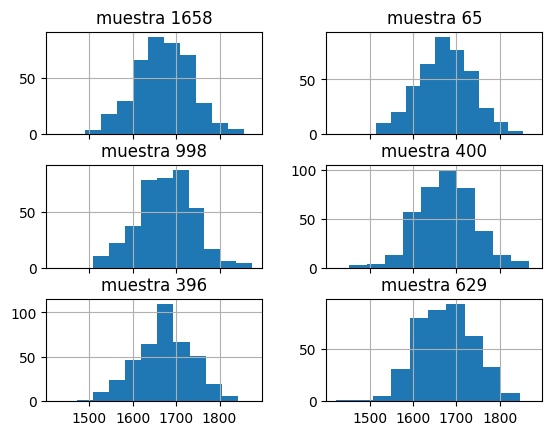

In [112]:
alturas_hombres.sample(6, axis = 1).hist(sharex= True)
plt.show()

<h2> Distribución de la suma

In [113]:
suma = alturas_hombres.sum()
suma

muestra 1       669971.202156
muestra 2       671127.692424
muestra 3       670715.227661
muestra 4       668798.265281
muestra 5       671521.621238
                    ...      
muestra 1996    668993.358952
muestra 1997    669983.663018
muestra 1998    671585.503072
muestra 1999    670829.696258
muestra 2000    669440.260486
Length: 2000, dtype: float64

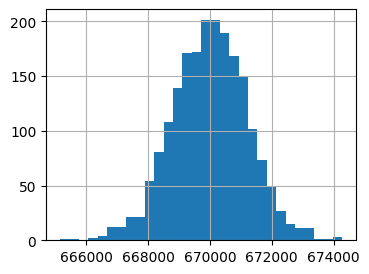

In [114]:
suma.hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los promedios

In [115]:
medias = alturas_hombres.mean()
medias

muestra 1       1674.928005
muestra 2       1677.819231
muestra 3       1676.788069
muestra 4       1671.995663
muestra 5       1678.804053
                   ...     
muestra 1996    1672.483397
muestra 1997    1674.959158
muestra 1998    1678.963758
muestra 1999    1677.074241
muestra 2000    1673.600651
Length: 2000, dtype: float64

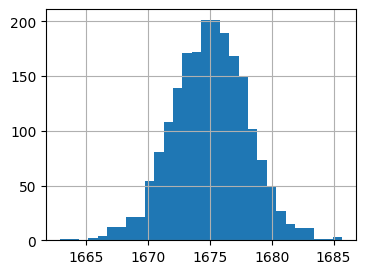

In [116]:
medias.hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los errores

In [117]:
errores = mu - medias
errores

muestra 1       0.071995
muestra 2      -2.819231
muestra 3      -1.788069
muestra 4       3.004337
muestra 5      -3.804053
                  ...   
muestra 1996    2.516603
muestra 1997    0.040842
muestra 1998   -3.963758
muestra 1999   -2.074241
muestra 2000    1.399349
Length: 2000, dtype: float64

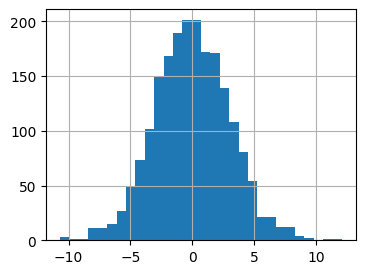

In [118]:
errores.hist(bins=30, figsize=(4,3))
plt.show()

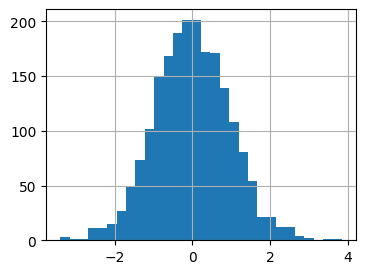

In [119]:
# podemos llegar a la distribución normal estándar
(errores/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()

# Distribución Bernoulli (Agujas de Buffon)

<h2> Obtener muestras

In [120]:
def cruce_agujas_Buffon(n):
    l = 1
    l_cuadrado = 10

    x = np.random.uniform(0, l_cuadrado, n) # coordenada x del centro de la aguja
    y = np.random.uniform(0, l_cuadrado, n) # cordenada y del centro del aguja
    𝜃 = np.random.uniform(0, np.pi, n) # angulo de rotación de la aguja en radianes, entre 0 y pi (180 grados)

    # Calcula coordenadas extremos (P1 y P2)
    x1 = x - (1/2 * np.cos(𝜃))
    y1 = y - (1/2 * np.sin(𝜃))

    x2 = x + (1/2 * np.cos(𝜃))
    y2 = y + (1/2 * np.sin(𝜃))

    # ¿Cruza alguna de las lineas del tapete?
    cruza = np.where(np.floor(y1) != np.floor(y2), 1, 0)    # np.floor(3.76) = 3

    return cruza

In [121]:
n = 3408 # tamaño de la muestra
m = 2000 # número de muestras
Buffon_df= pd.DataFrame.from_dict({'experimento '+str(i): cruce_agujas_Buffon(n) for i in range(1, m+1)})
Buffon_df

,experimento 1,experimento 2,experimento 3,experimento 4,experimento 5,experimento 6,experimento 7,experimento 8,experimento 9,experimento 10,...,experimento 1991,experimento 1992,experimento 1993,experimento 1994,experimento 1995,experimento 1996,experimento 1997,experimento 1998,experimento 1999,experimento 2000
0,0,0,0,0,1,1,1,1,0,0,...,1,1,1,0,0,1,1,0,0,1
1,1,1,0,1,1,0,0,1,0,0,...,1,1,0,1,1,0,1,1,0,0
2,0,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,1,1,0,1
3,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,1,0,0,0,1,0
4,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0,1,1,1,0,0,1,0,1,1,...,0,1,0,1,1,1,1,0,0,1
3404,1,1,1,0,0,1,1,0,1,1,...,1,0,1,1,1,0,0,1,1,1
3405,0,1,1,0,1,1,0,1,1,1,...,1,0,1,0,1,0,1,1,0,1
3406,1,0,0,0,1,1,1,1,0,0,...,0,1,0,0,0,0,1,1,1,1


<h2> Distribución de cada muestra

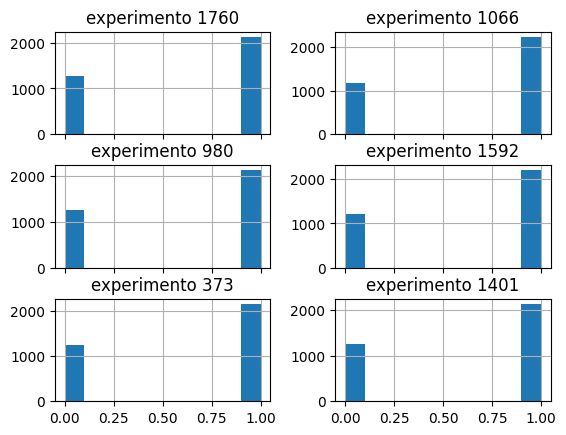

In [122]:
Buffon_df.sample(6, axis = 1).hist(sharex= True)
plt.show()

<h2>Distribución de la suma

In [123]:
suma = Buffon_df.sum()
suma

experimento 1       2122
experimento 2       2191
experimento 3       2156
experimento 4       2155
experimento 5       2142
                    ... 
experimento 1996    2197
experimento 1997    2128
experimento 1998    2148
experimento 1999    2174
experimento 2000    2164
Length: 2000, dtype: int64

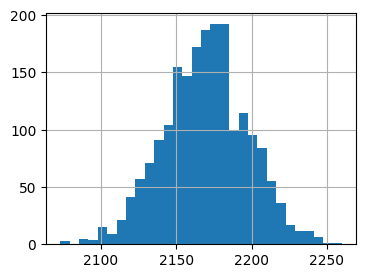

In [124]:
suma.hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los promedios

In [126]:
medias = Buffon_df.mean()
medias

experimento 1       0.622653
experimento 2       0.642899
experimento 3       0.632629
experimento 4       0.632336
experimento 5       0.628521
                      ...   
experimento 1996    0.644660
experimento 1997    0.624413
experimento 1998    0.630282
experimento 1999    0.637911
experimento 2000    0.634977
Length: 2000, dtype: float64

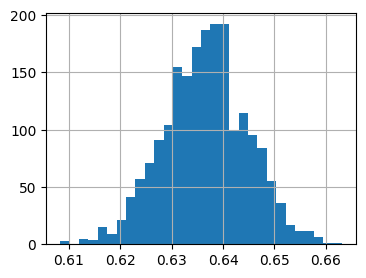

In [127]:
medias.hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los errores

In [128]:
errores = 2/np.pi - medias
errores

experimento 1       0.013967
experimento 2      -0.006279
experimento 3       0.003991
experimento 4       0.004284
experimento 5       0.008099
                      ...   
experimento 1996   -0.008040
experimento 1997    0.012207
experimento 1998    0.006338
experimento 1999   -0.001291
experimento 2000    0.001643
Length: 2000, dtype: float64

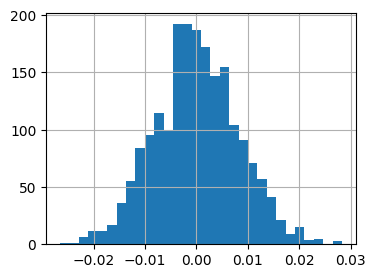

In [129]:
errores.hist(bins=30, figsize=(4,3))
plt.show()

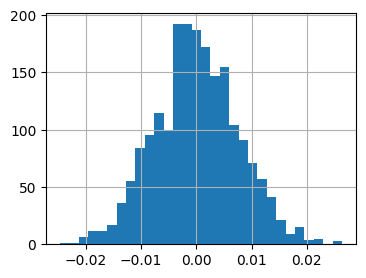

In [132]:
# podemos llegar a la distribución normal estándar
(errores/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()

# Distribución Bernoulli (obtener una vocal)

<h2> Preprocesar libro y obtener probabilidades de los caracteres

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
#Leer libro
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez',
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)
libro_limpio = limpiar_texto(libro)

In [81]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

# Calcular la probabilidad de obtener una vocal

filtro_vocal = Ley_P_letras['caracter'].isin(list('aeiou'))
p = Ley_P_letras.loc[filtro_vocal, 'probabilidad'].sum()
p

0.38405272562528125

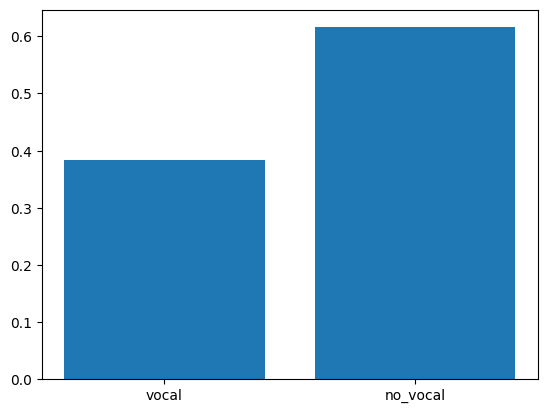

In [82]:
# Distribución bernoulli

plt.bar(['vocal','no_vocal'],[p, 1-p])
plt.show()

<h2> Obtener muestras

In [134]:
%%time
n = 400 # tamaño de la muestra
m = 100000 # número de muestras

muestras=pd.DataFrame()
muestras['texto'] = (genera_muestras_de_texto(libro_limpio, grado = 0,
                                              num_muestras = m, tam_muestra=n))
indice=pd.Series(['muestra_'+str(i) for i in range (1, m+1)])
muestras.index=indice
muestras['vocales'] = muestras['texto'].apply(cuenta_vocales)
muestras['p_estimada'] = muestras['vocales']/n
muestras['errores']= p - muestras['vocales']/n

CPU times: user 27.9 s, sys: 68.2 ms, total: 28 s
Wall time: 28.7 s


In [135]:
muestras.head()

,texto,vocales,p_estimada,errores
muestra_1,u n nanss clenare baa ctvrqap aedciudeiou lnc...,161,0.4025,-0.018447
muestra_2,sosqeooiieena oreb aee amlaei mree irete ceo...,165,0.4125,-0.028447
muestra_3,is a ooya iav li cgr comaan irel u aaealal cn...,159,0.3975,-0.013447
muestra_4,onaeesnro aect os usuaaim arlr ciio gsc cae...,161,0.4025,-0.018447
muestra_5,uoea naonmaom rsi ucnseuoyl tnotrsres aog lle ...,149,0.3725,0.011553


<h2> Distribución de la suma

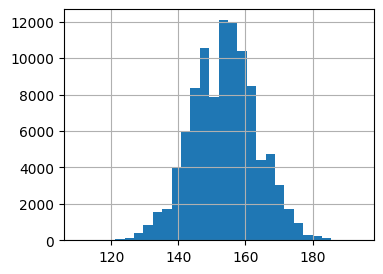

In [137]:
muestras['vocales'].hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los promedios

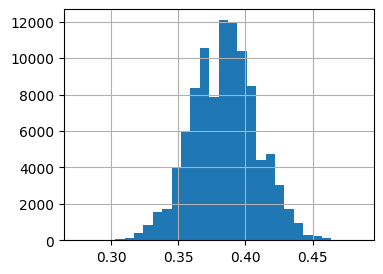

In [138]:
muestras['p_estimada'].hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los errores

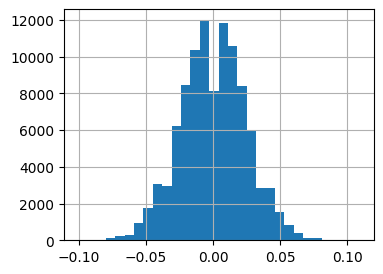

In [139]:
muestras['errores'].hist(bins=30, figsize=(4,3))
plt.show()

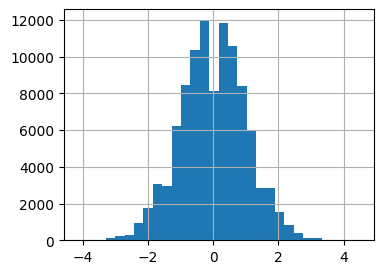

In [140]:
# podemos llegar a la distribución normal estandar
sigma = np.sqrt(p*(1-p))
(muestras['errores']/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()


# Distribución exponencial (carácteres antes de que salga n)

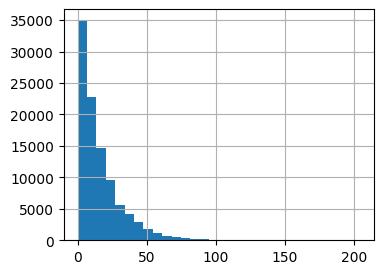

In [153]:
X = muestras['texto'].apply(cuenta_caracteres_antes_de_n)
X.hist(bins=30, figsize=(4,3))
plt.show()

In [154]:
X.mean()

15.80554

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

<h2> Obtener muestras

In [155]:
n = 400 # tamaño de la muestra
m = 2000 # número de muestras
m_exp = {'muestra '+str(i):np.random.choice(X, n) for i in range(1, m+1)}

muestras_exp = pd.DataFrame.from_dict(m_exp)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,20,18,1,43,14,5,15,1,30,20,...,5,8,6,2,10,6,35,26,8,20
1,16,10,14,2,21,0,0,15,24,26,...,10,17,33,8,9,49,1,36,11,19
2,42,16,5,4,11,10,13,16,2,7,...,6,10,1,7,23,2,0,24,1,15
3,13,15,6,0,55,52,15,32,8,2,...,9,12,1,29,21,66,9,6,10,9
4,31,12,5,2,1,1,12,28,9,7,...,80,6,34,2,0,33,14,17,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9,41,7,4,1,25,43,13,15,45,...,1,2,14,41,1,30,10,2,42,6
396,23,16,8,21,1,18,25,3,3,12,...,15,31,6,0,12,16,4,31,20,14
397,9,10,3,1,4,30,34,9,1,77,...,10,13,14,17,64,6,5,1,13,14
398,14,11,21,2,26,8,31,57,31,51,...,2,1,5,10,0,0,28,4,7,4


<h2> Distribución de cada muestra

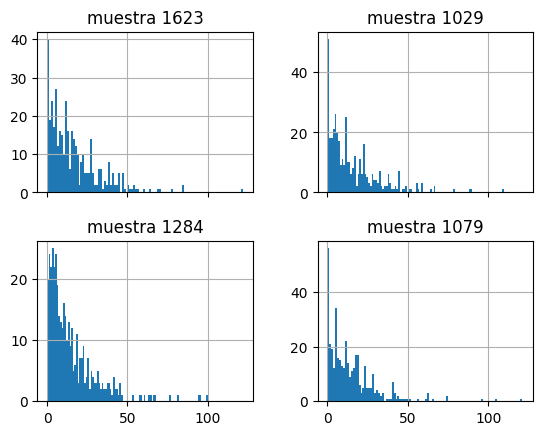

In [156]:
muestras_exp.sample(4, axis = 1).hist(sharex= True, bins=100)
plt.show()

<h2>Distribución de la suma

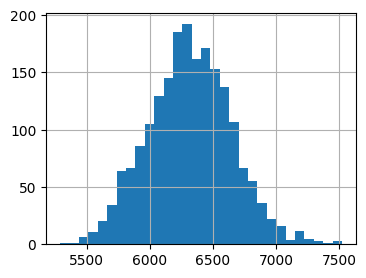

In [157]:
muestras_exp.sum().hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los promedios

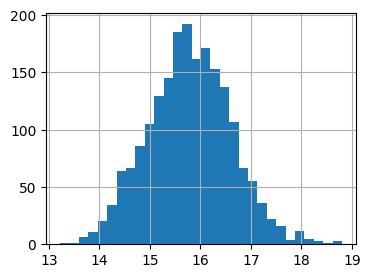

In [158]:
muestras_exp.mean().hist(bins=30, figsize=(4,3))
plt.show()


<h2>Distribución de los errores

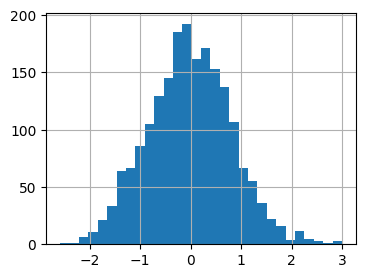

In [159]:
errores = muestras_exp.mean() - X.mean()
errores.hist(bins=30, figsize=(4,3))
plt.show()



https://seeing-theory.brown.edu/probability-distributions/index.html

